In [26]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn
import csv
import pandas as pd

import dataset
import datasplit
import model.models as models
import trainer
import utils

In [2]:
models_folder = '../../saved/models'
model_name = '20201024_fxnet_mono_rnd_bg_best'
results_folder = '../../saved/results'
results_subfolder = '20201024_fxnet_mono_rnd_bg'

In [3]:
# load model
fxnet = torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu'))

In [4]:
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

In [5]:
train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

In [23]:
test_set_size

26000

In [6]:
# BEST RESULTS
print('Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

Accuracy:  93.20726495726495
Epoch:  81

Accuracy:  91.32692307692308
Epoch:  67

Accuracy:  90.84615384615384
Epoch:  67



In [7]:
# # LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_losses, 'b', label='Train loss')
# plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
# plt.plot(epochs, all_test_losses, 'g', label='Test loss')
# plt.title('Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [8]:
# # NORMALISED LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
# plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
# plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
# plt.title('Normalised Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [9]:
# # ACCURACY
# all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
# all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
# all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_perc_correct, 'b', label='Train loss')
# plt.plot(epochs, all_val_perc_correct, 'r', label='Validation loss')
# plt.plot(epochs, all_test_perc_correct, 'g', label='Test loss')
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [10]:
best_train_results[0]

array(['123956', 'G93-65506-VTB-F7.1-21197', '12', '12'], dtype='<U28')

In [11]:
# CONFUSION MATRICES

# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# Confusion matrices for best validation epoch
# extract predictions and targets vectors
train_preds = best_train_results[:, 2]
train_targets = best_train_results[:, 3]
val_preds = best_val_results[:, 2]
val_targets = best_val_results[:, 3]
test_preds = best_test_results[:, 2]
test_targets = best_test_results[:, 3]

# calculate conf. matrix
train_cm = confusion_matrix(y_true=train_targets, y_pred=train_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
val_cm = confusion_matrix(y_true=val_targets, y_pred=val_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
test_cm = confusion_matrix(y_true=test_targets, y_pred=test_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Best Validation Accuracy:  91.32692307692308 at epoch  67
Training Accuracy:  92.88568376068376
Test Accuracy:  90.84615384615384


In [12]:
# # Train CM
# plt.figure(figsize=(8,8))
# plt.rcParams.update({'font.size': 12})
# utils.plot_confusion_matrix(train_cm, fx_labels, normalize=True, title='FxNet - train confusion matrix')
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_train_cm_norm.svg'))

In [13]:
# plt.figure(figsize=(8,8))
# plt.rcParams.update({'font.size': 10})
# utils.plot_confusion_matrix(val_cm, fx_labels, normalize=True, title='FxNet - validation confusion matrix')
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_val_cm_norm.svg'))

Normalized confusion matrix


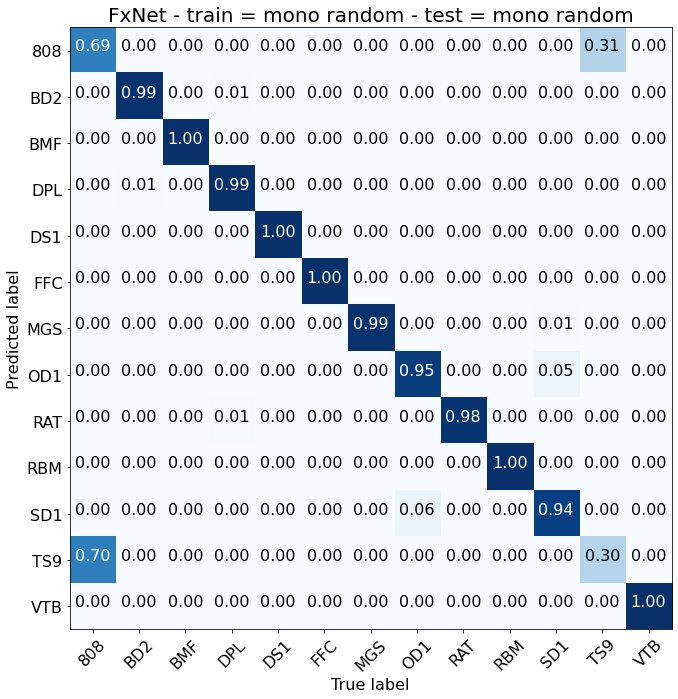

In [47]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = mono')
plt.title('FxNet - train = mono random - test = mono random', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)   
plt.tight_layout()
# plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_monornd_monornd_cm.eps'), format='eps')

### TEST on POLY

In [23]:
dataset_poly = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Poly',
                            excl_folders=['NoFX_poly', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )
dataset_poly.init_dataset()
# dataset.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly = datasplit.DataSplit(dataset_poly, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly = split_poly.get_split(batch_size=100)

In [24]:
len(dataset_poly)

83160

In [25]:
test_poly_loss, test_poly_correct, test_poly_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_poly, 
        test_sampler=split_poly.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 18243.1460	 Avg Loss: 0.2194	Correct: 16328/83160	Percentage Correct: 19.63


In [26]:
test_poly_results_npy = np.array(test_poly_results)

test_poly_preds = test_poly_results_npy[:, 2]
test_poly_targets = test_poly_results_npy[:, 3]

# calculate conf. matrix
test_poly_cm = confusion_matrix(test_poly_targets, test_poly_preds)

Normalized confusion matrix


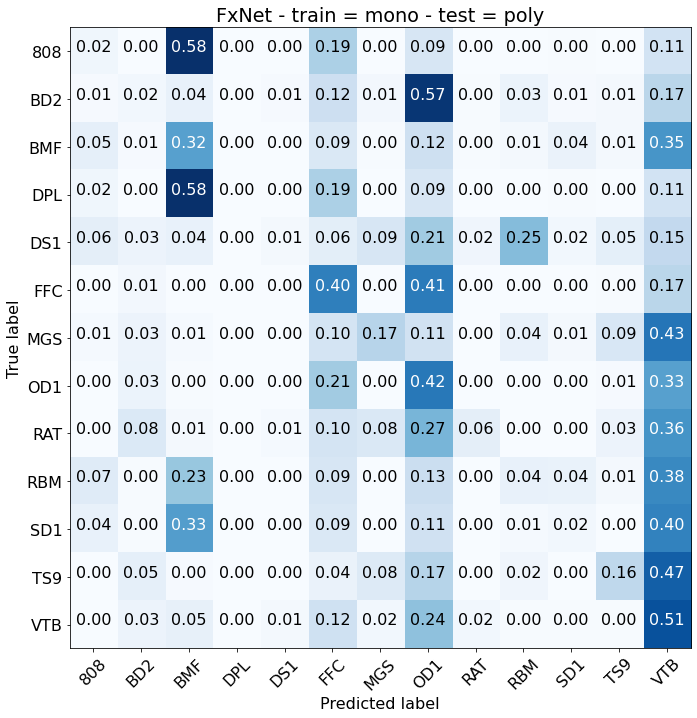

In [27]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_poly_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = poly')
# plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_mono_test_poly_cm.svg'))

### TEST on POLY RANDOM

In [28]:
# dataset
dataset_poly_rnd = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Poly_Random_Bg',
                            excl_folders=['NoFX_poly', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )

dataset_poly_rnd.init_dataset()
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly_rnd = datasplit.DataSplit(dataset_poly_rnd, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly_rnd = split_poly_rnd.get_split(batch_size=100)

In [30]:
len(dataset_poly_rnd)

130000

In [32]:
test_poly_rnd_loss, test_poly_rnd_correct, test_poly_rnd_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_poly_rnd, 
        test_sampler=split_poly_rnd.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 27980.3114	 Avg Loss: 0.2152	Correct: 21437/130000	Percentage Correct: 16.49


In [33]:
test_poly_rnd_results_npy = np.array(test_poly_rnd_results)

test_poly_rnd_preds = test_poly_rnd_results_npy[:, 2]
test_poly_rnd_targets = test_poly_rnd_results_npy[:, 3]

# calculate conf. matrix
test_poly_rnd_cm = confusion_matrix(test_poly_rnd_targets, test_poly_rnd_preds)

Normalized confusion matrix


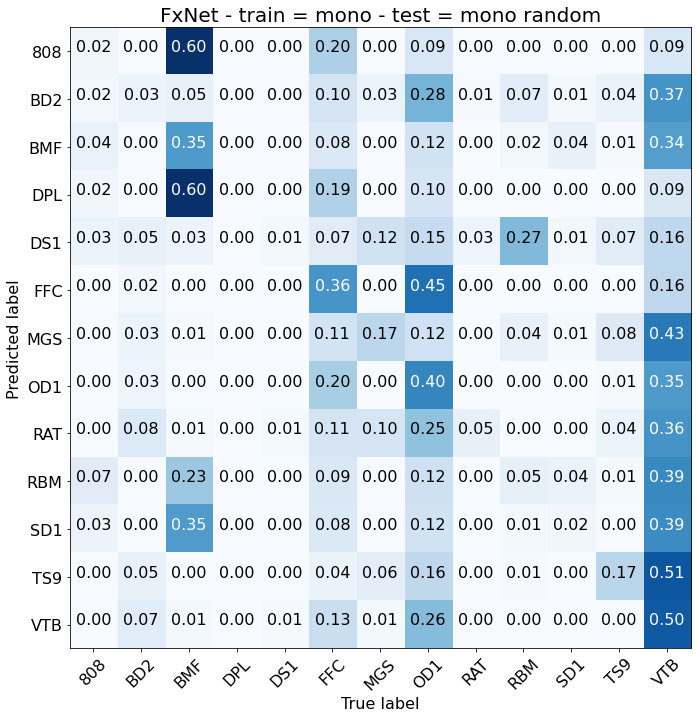

In [34]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_poly_rnd_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = mono random')
plt.title('FxNet - train = mono - test = mono random', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16) 
# plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_test_cm.svg'))

### TEST on MONO

In [16]:
# dataset
dataset_mono = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Mono',
                            excl_folders=['NoFX_mono', 'NoFX_mono_preprocessed', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )
dataset_mono.init_dataset()
# dataset_poly_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono = datasplit.DataSplit(dataset_mono, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono = split_mono.get_split(batch_size=100)

In [17]:
len(dataset_mono)

123552

In [18]:
test_mono_loss, test_mono_correct, test_mono_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_mono, 
        test_sampler=split_mono.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 2230.4510	 Avg Loss: 0.0181	Correct: 100494/123552	Percentage Correct: 81.34


In [19]:
test_mono_results_npy = np.array(test_mono_results)

test_mono_preds = test_mono_results_npy[:, 2]
test_mono_targets = test_mono_results_npy[:, 3]

# calculate conf. matrix
test_mono_cm = confusion_matrix(y_true=test_mono_targets, y_pred=test_mono_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Normalized confusion matrix


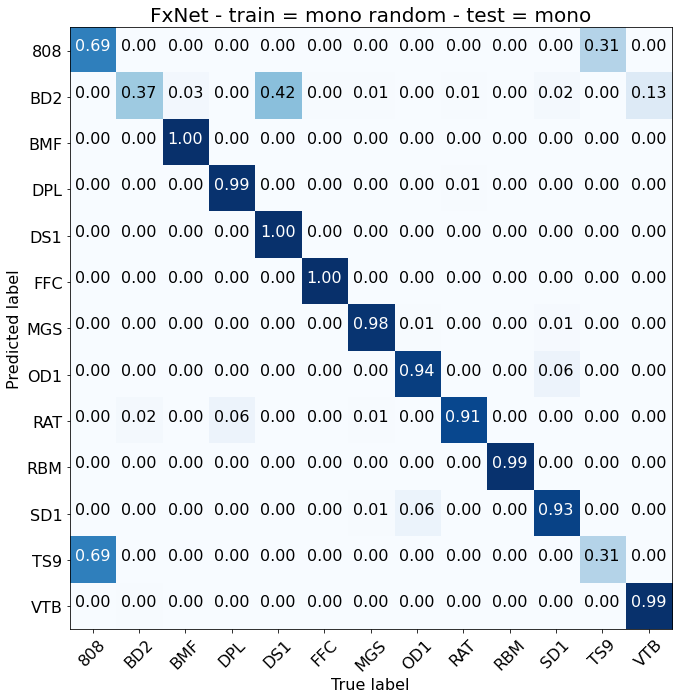

In [48]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_mono_cm, fx_labels, normalize=True, title='FxNet - train = mono rnd - test = mono')
plt.title('FxNet - train = mono random - test = mono', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)   
plt.tight_layout()
# plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_monornd_mono_cm.eps'), format='eps')

In [27]:
# extract vectors for dataframe
indexes = test_mono_results_npy[:, 0]
filenames = test_mono_results_npy[:, 1] 
preds = np.stack(test_mono_results_npy[:, 2])
targets = np.stack(test_mono_results_npy[:, 3])

df = pd.DataFrame(data={
                                'index': indexes, 
                                'filename': filenames,
                                'fx_pred': preds,
                                'fx_targ': targets 
                            })
df[:5]

,index,filename,fx_pred,fx_targ
0,63547,G93-53208-MGS-D8T10-21160,6,6
1,104120,G81-49204-SD1-D10T8-20922,10,10
2,62330,G73-66602-MGS-D10T8-20894,6,6
3,109018,G93-58403-TS9-D5T8-21181,0,11
4,77725,G91-66602-RAT-D8F5-21128,8,8


In [28]:
dataset_mono.fx_to_label

{'808': 0,
 'BD2': 1,
 'BMF': 2,
 'DPL': 3,
 'DS1': 4,
 'FFC': 5,
 'MGS': 6,
 'OD1': 7,
 'RAT': 8,
 'RBM': 9,
 'SD1': 10,
 'TS9': 11,
 'VTB': 12}

In [30]:
one_fx = df[df['filename'].str.contains('-BD2-')]
one_fx[:10]

,index,filename,fx_pred,fx_targ
35,22093,G81-47107-BD2-G10T5-20912,4,1
37,20218,G93-67603-BD2-G2T10-21207,2,1
53,20142,G91-67603-BD2-G8T0-21129,12,1
58,12945,G71-76612-BD2-G5T10-20826,1,1
62,13017,G81-56211-BD2-G5T2-20929,12,1
64,24550,G71-47202-BD2-G8T2-20764,1,1
65,19838,G63-41101-BD2-G2T10-20672,1,1
68,17832,G61-47107-BD2-G5T8-20600,1,1
108,13086,G61-60310-BD2-G2T8-20629,1,1
126,15292,G93-52112-BD2-G2T0-21151,2,1


In [43]:
wrong_df = one_fx[one_fx['fx_pred'].str.fullmatch('12')]
wrong_df

,index,filename,fx_pred,fx_targ
53,20142,G91-67603-BD2-G8T0-21129,12,1
62,13017,G81-56211-BD2-G5T2-20929,12,1
148,23664,G73-58403-BD2-G5T0-20869,12,1
189,17860,G93-68509-BD2-G8T8-21200,12,1
250,24303,G93-53303-BD2-G10T2-21168,12,1
...,...,...,...,...
123503,20683,G93-64600-BD2-G5T2-21204,12,1
123527,14320,G91-74610-BD2-G10T0-21136,12,1
123528,22226,G91-45105-BD2-G10T2-21066,12,1
123533,14596,G83-73609-BD2-G8T8-21057,12,1


In [44]:
print('G10 T10: ',   len(wrong_df[wrong_df['filename'].str.contains('-G10T10-')]))
print('G10 T8 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G10T8-')]))
print('G10 T5 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G10T5-')]))
print('G10 T2 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G10T2-')]))
print('G10 T0 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G10T0-')]))

print('G8 T10: ',   len(wrong_df[wrong_df['filename'].str.contains('-G8T10-')]))
print('G8 T8 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G8T8-')]))
print('G8 T5 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G8T5-')]))
print('G8 T2 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G8T2-')]))
print('G8 T0 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G8T0-')]))

print('G5 T10: ',   len(wrong_df[wrong_df['filename'].str.contains('-G5T10-')]))
print('G5 T8 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G5T8-')]))
print('G5 T5 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G5T5-')]))
print('G5 T2 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G5T2-')]))
print('G5 T0 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G5T0-')]))

print('G2 T10: ',   len(wrong_df[wrong_df['filename'].str.contains('-G2T10-')]))
print('G2 T8 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G2T8-')]))
print('G2 T5 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G2T5-')]))
print('G2 T2 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G2T2-')]))
print('G2 T0 : ',   len(wrong_df[wrong_df['filename'].str.contains('-G2T0-')]))

G10 T10:  54
G10 T8 :  79
G10 T5 :  66
G10 T2 :  156
G10 T0 :  112
G8 T10:  49
G8 T8 :  78
G8 T5 :  67
G8 T2 :  166
G8 T0 :  100
G5 T10:  60
G5 T8 :  97
G5 T5 :  37
G5 T2 :  121
G5 T0 :  68
G2 T10:  64
G2 T8 :  92
G2 T5 :  30
G2 T2 :  96
G2 T0 :  26
